# Import Tensorflow and libraries

In [51]:
import tensorflow.compat.v1 as tf

In [52]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras import datasets, layers, models

tf.keras.backend.clear_session()


# loaded the dataset

In [53]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


In [56]:
train_dir = r'C:\Users\dell\Downloads\soil_image idetification using CNN\soil_images\Dataset\Train'
test_dir = r'C:\Users\dell\Downloads\soil_image idetification using CNN\soil_images\Dataset\test'

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(32, 32),  # Assuming you want to resize images to 32x32
    batch_size=20,
    class_mode='binary')  # or 'categorical' for multi-class

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(32, 32),
    batch_size=20,
    class_mode='binary')  # or 'categorical' for multi-class


Found 1215 images belonging to 4 classes.
Found 340 images belonging to 4 classes.


In [57]:
validation_datagen = ImageDataGenerator(rescale=1./255)  # Define data generator with appropriate preprocessing

# Define the directory for validation data
validation_dir =r'C:\Users\dell\Downloads\soil_image idetification using CNN\soil_images\Dataset\Train'

# Create the validation data generator
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(32, 32),
    batch_size=20,
    class_mode='binary'  # or 'categorical' for multi-class
)


Found 1215 images belonging to 4 classes.


# Verify the data

In [58]:
# define the class name of the of the datasets

class_names = ['Red soil', 'Clay soil', 'Black soil', 'Alluvial soil']


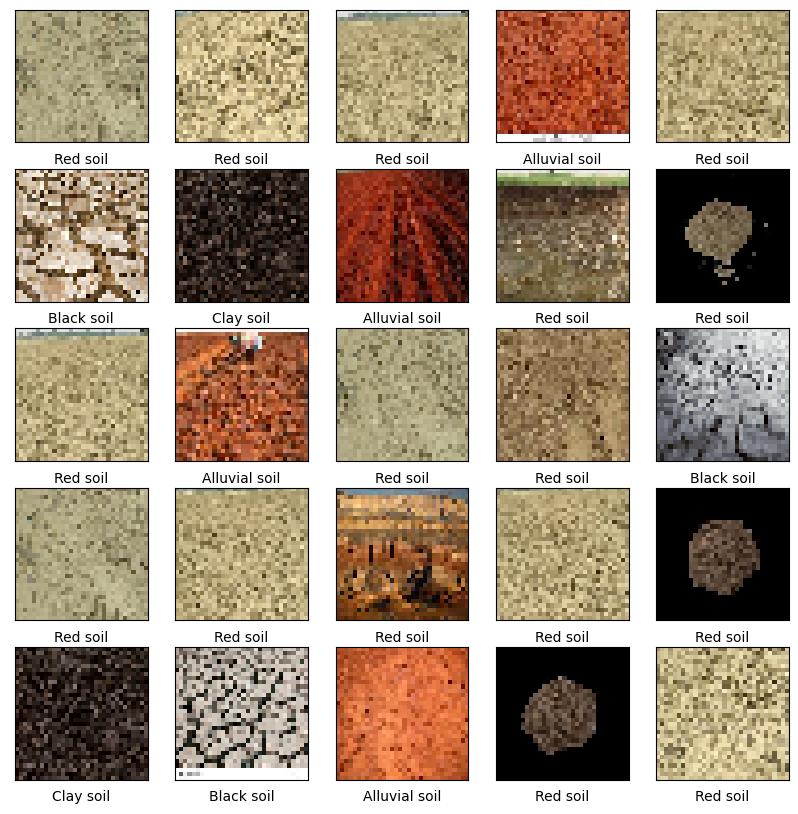

In [59]:
# Display the first 25 images from the training set
plt.figure(figsize=(10, 10))
for i in range(25):
    batch = next(train_generator)  # Generate the next batch of images and labels
    image = batch[0][0]  # Extract the first image from the batch
    label = batch[1][0]  # Extract the label corresponding to the first image
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image)
    plt.xlabel(class_names[int(label)])  # Convert label to integer and display corresponding class name
plt.show()


# Create the Convolutional base


In [60]:
from tensorflow.keras.layers import MaxPooling2D

# Specify pool_size explicitly to avoid the warning
MaxPooling2D(pool_size=(2, 2))


In [61]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))  # Specify pool_size explicitly to avoid the warning
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))  # Specify pool_size explicitly to avoid the warning
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))  # 4 output units for 4 classes, softmax activation for multi-class classification


In [62]:
#from tensorflow.keras import models, layers
#from tensorflow.keras.layers import MaxPooling2D


#model = models.Sequential()
#odel.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
# Specify pool_size explicitly to avoid the warning
#MaxPooling2D(pool_size=(2, 2))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#model.add(layers.Flatten())
#model.add(layers.Dense(64, activation='relu'))
#model.add(layers.Dense(4, activation='softmax'))  # 4 output units for 4 classes, softmax activation for multi-class classification

In [63]:
model.summary()  # Print the model summary to review the architecture

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

# Add dense layers on the top

In [64]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))


In [65]:
model.add(layers.Dense(4, activation='softmax'))


In [66]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

# Compile and Train the model


In [67]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

# Compile the model with the Adam optimizer and SparseCategoricalCrossentropy loss
model.compile(optimizer=Adam(),
              loss=SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

# Train the model using the generators
history = model.fit(
    train_generator,
    epochs=12,
    validation_data=validation_generator
)
 

Epoch 1/12
61/61 [==============================] - 30s 470ms/step - loss: 1.4084 - accuracy: 0.2198 - val_loss: 1.3624 - val_accuracy: 0.2198
Epoch 2/12
61/61 [==============================] - 27s 451ms/step - loss: 1.2899 - accuracy: 0.2675 - val_loss: 1.2191 - val_accuracy: 0.3276
Epoch 3/12
61/61 [==============================] - 27s 444ms/step - loss: 1.2061 - accuracy: 0.5342 - val_loss: 1.2302 - val_accuracy: 0.5342
Epoch 4/12
61/61 [==============================] - 27s 454ms/step - loss: 1.1364 - accuracy: 0.5934 - val_loss: 1.0953 - val_accuracy: 0.5918
Epoch 5/12
61/61 [==============================] - 27s 454ms/step - loss: 1.0713 - accuracy: 0.5794 - val_loss: 1.0410 - val_accuracy: 0.5852
Epoch 6/12
61/61 [==============================] - 27s 450ms/step - loss: 1.0231 - accuracy: 0.5885 - val_loss: 0.9942 - val_accuracy: 0.6239
Epoch 7/12
61/61 [==============================] - 27s 447ms/step - loss: 1.0006 - accuracy: 0.5852 - val_loss: 0.9795 - val_accuracy: 0.6173

# Evaluate the model

In [68]:
image_height = 150  # Set the desired height of the images
image_width = 150   # Set the desired width of the images
batch_size = 32  # Set the desired batch size



In [69]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='binary'  # or 'categorical' depending on your labels
)


Found 340 images belonging to 4 classes.


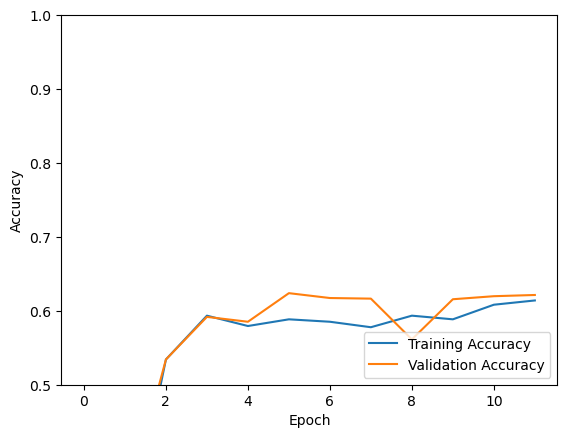

In [70]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()


In [71]:
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image

Text(0.5, 1.0, 'model loss')

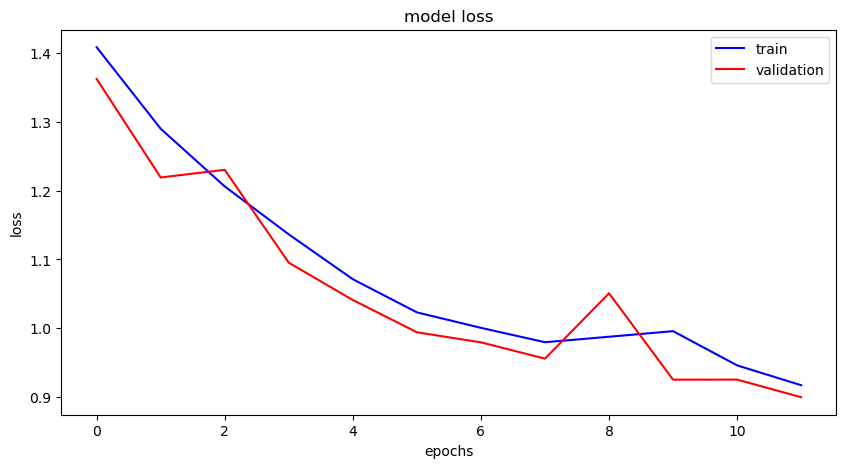

In [72]:

plt.figure(figsize=(10,5))
plt.plot(model.history.history['loss'],color='b',label='Training loss')
plt.plot(model.history.history['val_loss'],color='r',label='Validation loss')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(['train', 'validation'], loc='upper right')
plt.title("model loss")

Text(0.5, 1.0, 'model accuracy')

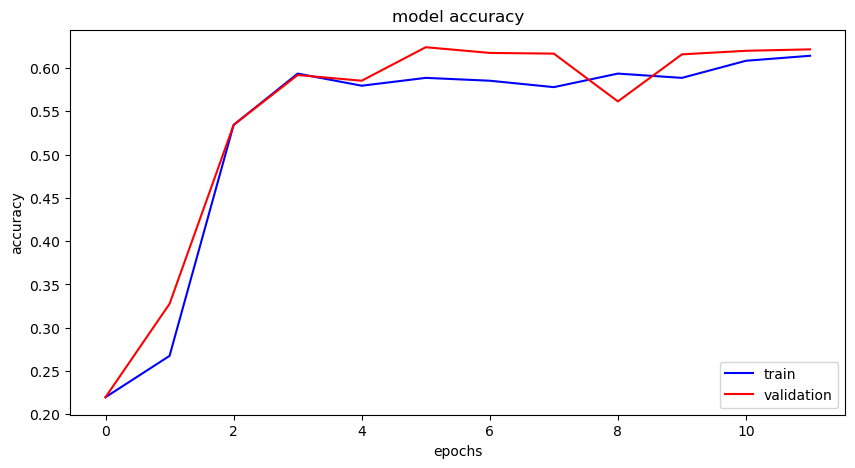

In [73]:

plt.figure(figsize=(10,5))
plt.plot(model.history.history['accuracy'],color='b',label='Training accuracy')
plt.plot(model.history.history['val_accuracy'],color='r',label='Validation accsuracy')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend(['train', 'validation'], loc='lower right')
plt.title("model accuracy")